In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df_fake = pd.read_csv("../data/raw/Fake.csv")
df_real = pd.read_csv("../data/raw/True.csv")


In [74]:
print(df_fake.shape)
print(df_real.shape)

(23481, 4)
(21417, 4)


In [75]:
df_fake.head()
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [76]:
df_fake['label'] = 0  # 0 for fake
df_real['label'] = 1  # 1 for real
df_all = pd.concat([df_fake, df_real], ignore_index=True)

In [77]:
df_all.isnull().sum()
df_all.duplicated().sum()
df_all = df_all.drop_duplicates()

In [78]:
df_all['label'].value_counts()
df_all['label'].value_counts(normalize=True)

label
0    0.525364
1    0.474636
Name: proportion, dtype: float64

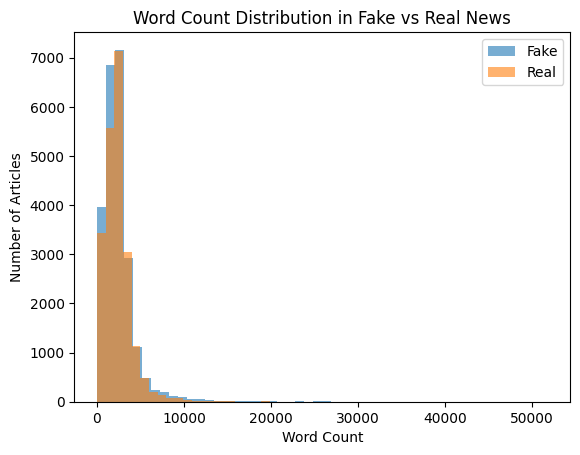

In [79]:
df_fake['word_count'] = df_all['text'].apply(len)
df_fake['word_count'].describe()

df_real['word_count'] = df_all['text'].apply(len)
df_real['word_count'].describe()

plt.hist(df_fake['word_count'], bins=50, alpha=0.6, label='Fake')
plt.hist(df_real['word_count'], bins=50, alpha=0.6, label='Real')
plt.xlabel("Word Count")
plt.ylabel("Number of Articles")
plt.legend()
plt.title("Word Count Distribution in Fake vs Real News")
plt.show()